### Hello, and welcome to the last and final practical

This tut will show you how to do the following:
 - How to use machine learning (logistic regression, and random forest) tools with some parameter optimization to classify rooibos tea
 - how to compare those methods against each other using jackknife and the baseline

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from source.ml_acc import get_accuracy_ml #importing the ml_ accuarcy code from source ml_acc file
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from source.calculate_jack import jack_SD # importing the baseline code from source.basline file

%store -r df
%store -r base_dict 
# will be used for the difference

### define hyper parameter for the ML methods

In [39]:
## logisitc regression (LR)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01, 0.001]

lr = LogisticRegression()
lr_par = dict(solver=solvers,penalty=penalty,C=c_values)

## random forest (RF)

n_estimators = range(10, 500, 100)
print(n_estimators)
rf = RandomForestClassifier(random_state=1)
rf_par = dict(n_estimators=n_estimators)

range(10, 500, 100)


In [40]:
# models = [[rf, 'rf'], [lr, 'lr']]
# parameters = [rf_par, lr_par]
models = [[rf, 'rf']]

parameters = [rf_par]

In [45]:
y = df[['type']]
features = [ ['TPC_H2O'], ['TEAC_H2O'],  ['FRAP_H2O'], ['TPC_H2O', 'TEAC_H2O']]
splits = [0.4]

In [46]:
num_ml_tools = len(parameters)
ml_dicts = [{}]*num_ml_tools
print(ml_dicts)

[{}]


In [47]:
for m, par, d in zip(models, parameters, ml_dicts):
    for s in splits:
        X_train, X_test, y_train, y_test = train_test_split(df, y, test_size= s, random_state=1, stratify = y, shuffle = True)

        for f in features:
            xtr =  X_train[f]
            xte =  X_test[f]
            results = get_accuracy_ml (m[0], par, xtr, y_train, xte, y_test) # to get the accuracies for the ml model

            key = str(s)+","+str(f)

            d[key] = {}
            d[key]['tot_acc'] = results[0]
            d[key]['jack_train'] = results[1]
            d[key]['jack_test'] = results[2]

In [50]:
for d in ml_dicts: # a for loop in case we have more than 1 model
    print(d.keys())
    key = list(d.keys())[0] # prints the general keys
    print(key)
    print( d[key].keys() ) # prints the nested keys inside the first key
    print(d[key]['tot_acc']) # prints the info of the nested key in this case it is 'tot_acc'

dict_keys(["0.4,['TPC_H2O']", "0.4,['TEAC_H2O']", "0.4,['FRAP_H2O']", "0.4,['TPC_H2O', 'TEAC_H2O']"])
0.4,['TPC_H2O']
dict_keys(['tot_acc', 'jack_train', 'jack_test'])
0.55


### now let us draw the accuracy with the SD

0.4,['TPC_H2O']: 0.55
0.12755018892633252

0.4,['TEAC_H2O']: 0.55
0.1633373528190653

0.4,['FRAP_H2O']: 0.6
0.17099766572376984

0.4,['TPC_H2O', 'TEAC_H2O']: 0.8
0.19685852163152426



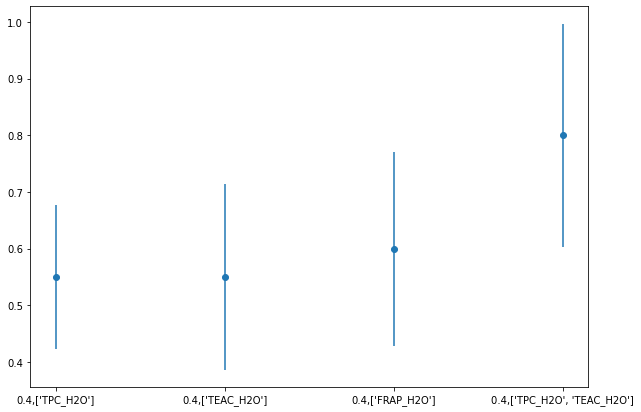

In [36]:
for m, d in zip (models, ml_dicts):
    acc_arr = [] 
    sd_arr = [] 


    for key in d.keys():

        print( str(key)+": "+str(d[key][ 'tot_acc' ] ))
        acc_arr.append(d[key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train = jack_SD(np.zeros( len(d[key][ 'jack_train' ]) ), d[key][ 'jack_train' ])[0]
        sd_test = jack_SD(np.zeros( len(d[key][ 'jack_test' ]) ), d[key][ 'jack_test' ])[0]
        sd = np.sqrt( np.array((sd_train**2)) + np.array((sd_test**2)))
        sd_arr.append(sd) # append sd_arr to an array
        print(sd)
        print()
    plt.figure(figsize=(10 , 7))
    plt.errorbar( list(d.keys()), acc_arr, sd_arr, fmt='o')


### SD difference

0.4,['TPC_H2O']: 0.0
0.17064756244021057

0.4,['TEAC_H2O']: -0.125
0.20134752860091776

0.4,['FRAP_H2O']: -0.15000000000000002
0.35103687096293823

0.4,['TPC_H2O', 'TEAC_H2O']: -0.04999999999999993
0.1992857646709563



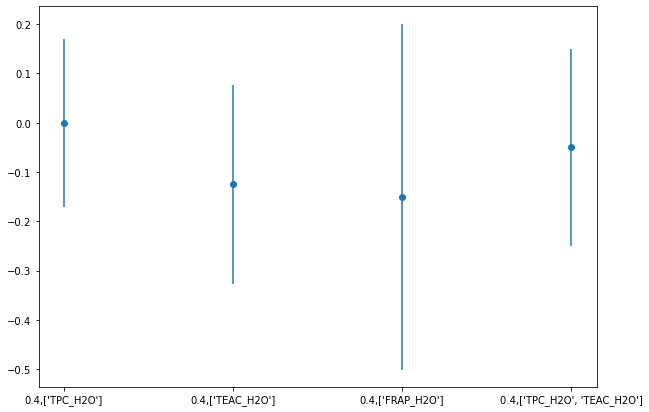

In [37]:
for m, d in zip (models, ml_dicts):
    acc_diff_arr = [] 
    sd_diff_arr = [] 


    for key in d.keys():

        print( str(key)+": "+str(d[key][ 'tot_acc' ] - base_dict[key][ 'tot_acc' ]))
        acc_diff_arr.append(d[key][ 'tot_acc' ] - base_dict[key][ 'tot_acc' ]) # append total accuracy to an array
        sd_train_diff = jack_SD( base_dict[key][ 'jack_train' ]  , d[key][ 'jack_train' ])[0]
        sd_test_diff =  jack_SD(  base_dict[key][ 'jack_test' ]  , d[key][ 'jack_test' ])[0]
        sd_diff = np.sqrt( np.array((sd_train_diff**2)) + np.array((sd_test_diff**2)))
        sd_diff_arr.append(sd_diff) # append sd_arr to an array
        
        print(sd_diff)
        print()
    plt.figure(figsize=(10 , 7))
    plt.errorbar( list(d.keys()), acc_diff_arr, sd_diff_arr, fmt='o')


### do it now with more models, and features. thanks and good luck

### also you can explore with more data set (privde links (E.H))